The following objects are masked from LungCapData (pos = 3):

    Age, Caesarean, Gender, Height, LungCap, Smoke



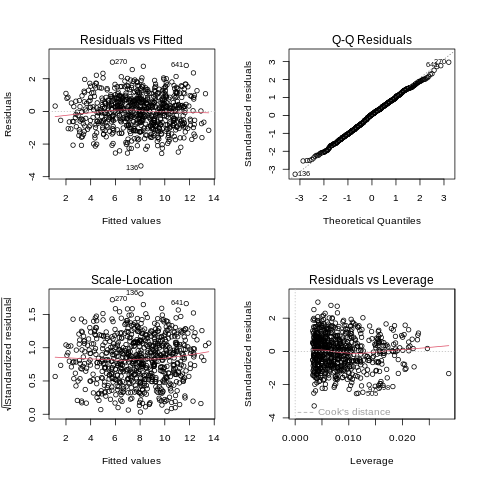

In [ ]:
%%R
# Charger les données et vérifier leur structure
LungCapData <- read.table("LungCapData.txt", header = TRUE, sep="\t")#header = TRUE : Indique que la première ligne contient les noms des colonnes.

# Permet d’accéder aux colonnes directement (ex: Age au lieu de LungCapData$Age)
attach(LungCapData)

# Afficher les noms des variables (LungCap, Age, Height, Smoke, Caesarean)
names(LungCapData)

# Vérifier si Age est un nombre (numeric) ou une catégorie (factor)
class(Age)

#Vérifier si Smoke est une variable catégorielle (factor) ou numérique
class(Smoke)

# Lister les niveaux de Smoke ("Yes" et "No" si c’est un facteur)
levels(Smoke)

#  Modèle de régression linéaire où LungCap (capacité pulmonaire) est expliquée par Age et Height
model1 <- lm(LungCap ~ Age + Height)

# Afficher les coefficients du modèle
summary(model1)

# Calculer la corrélation de Pearson entre Age et Height
cor(Age, Height, method="pearson")

#  Donner un intervalle de confiance à 95% pour chaque coefficient (Age, Height)
confint(model1, level=0.95)

# Modèle de régression avec toutes les variables
model2 <- lm(LungCap ~ Age + Height + Smoke + Gender + Caesarean)

# Résumé du second modèle
summary(model2)

# Tracer les graphiques du modèle
par(mfrow=c(2,2))  # Configure l'affichage en grille 2×2
plot(model2)       # Affiche les 4 graphiques dans cette grille


In [ ]:
!apt-get install -y r-base
!pip install rpy2
%load_ext rpy2.ipython
!R --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
R version 4.4.3 (2025-02-28) -- "Trophy Case"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [ ]:
%%R
install.packages("MASS", repos="http://cran.rstudio.com")
install.packages("caTools", repos="http://cran.rstudio.com")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/MASS_7.3-65.tar.gz'
Content type 'application/x-gzip' length 510322 bytes (498 KB)
downloaded 498 KB


The downloaded source packages are in
	‘/tmp/Rtmp2FzH16/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘bitops’

trying URL 'http://cran.rstudio.com/src/contrib/bitops_1.0-9.tar.gz'
Content type 'application/x-gzip' length 10941 bytes (10 KB)
downloaded 10 KB

trying URL 'http://cran.rstudio.com/src/contrib/caTools_1.18.3.tar.gz'
Content type 'application/x-gzip' length 65825 bytes (64 KB)
downloaded 64 KB


The downloaded source packages are in
	‘/tmp/Rtmp2FzH16/downloaded_packages’


# Rapport d'Analyse de la Capacité Pulmonaire

## Introduction
Cette analyse examine les facteurs qui influencent la capacité pulmonaire (LungCap) à partir d'un jeu de données contenant des informations sur l'âge, la taille, le statut tabagique, le genre et la naissance par césarienne. L'objectif est d'identifier les déterminants significatifs de la capacité pulmonaire et de quantifier leur impact.

## Données et Exploration

Le jeu de données LungCapData contient les variables suivantes :
- LungCap : Capacité pulmonaire (variable dépendante)
- Age : Âge des participants (variable numérique)
- Height : Taille des participants (variable numérique)
- Smoke : Statut tabagique (variable catégorielle : "Yes"/"No")
- Gender : Genre des participants (variable catégorielle)
- Caesarean : Naissance par césarienne (variable catégorielle)

L'exploration des données révèle que :
- La variable Age est de type numérique (numeric)
- La variable Smoke est une variable catégorielle (factor) avec deux niveaux : "No" et "Yes"
- Il existe une corrélation positive entre l'âge et la taille

## Modélisation

### Modèle 1 : Régression avec Age et Height

Ce premier modèle examine uniquement l'effet de l'âge et de la taille sur la capacité pulmonaire :

**Résultats** :
- Les deux variables (Age et Height) sont statistiquement très significatives (p < 0.001)
- Le coefficient pour Age indique l'augmentation de la capacité pulmonaire pour chaque année supplémentaire
- Le coefficient pour Height montre l'augmentation de la capacité pulmonaire pour chaque unité de taille supplémentaire
- Le modèle explique une proportion substantielle de la variance dans la capacité pulmonaire (R² ajusté élevé)
- L'erreur standard résiduelle représente la précision moyenne des prédictions

**Intervalles de confiance (95%)** :
- Pour Age : intervalle ne contenant pas zéro, confirmant l'effet positif significatif
- Pour Height : intervalle ne contenant pas zéro, confirmant l'effet positif significatif
- Ces intervalles représentent la plage dans laquelle se trouvent les véritables effets de ces variables avec 95% de confiance

### Modèle 2 : Régression avec toutes les variables

Ce modèle plus complet intègre également le statut tabagique, le genre et la naissance par césarienne :

**Résultats** :
- Age et Height restent des prédicteurs hautement significatifs
- SmokeYes montre un effet négatif sur la capacité pulmonaire (statistiquement significatif)
- Gender influence significativement la capacité pulmonaire
- Caesarean n'a pas d'effet statistiquement significatif sur la capacité pulmonaire
- Le R² ajusté est supérieur à celui du premier modèle, indiquant un meilleur ajustement global

### Diagnostics du Modèle

Les quatre graphiques diagnostiques générés pour le Modèle 2 permettent d'évaluer :
1. **Résidus vs Valeurs ajustées** : Vérifie l'homoscédasticité et la linéarité
2. **QQ-plot** : Évalue la normalité des résidus
3. **Scale-Location** : Examine la répartition de la variance des résidus
4. **Résidus vs Effet de levier** : Identifie les observations influentes et aberrantes

## Conclusions

1. L'âge et la taille sont les prédicteurs les plus importants de la capacité pulmonaire
2. Le tabagisme a un impact négatif significatif sur la capacité pulmonaire
3. Il existe des différences significatives de capacité pulmonaire selon le genre
4. La naissance par césarienne ne semble pas affecter significativement la capacité pulmonaire
5. Malgré la corrélation entre l'âge et la taille, ces deux variables apportent des informations complémentaires au modèle
